参考资料 https://www.cnblogs.com/stevenlk/p/6543628.html

# 1. Univariate Selection

对于分类问题(y离散)，可采用：
　　卡方检验，f_classif, mutual_info_classif，互信息
  
对于回归问题(y连续)，可采用：
　　　皮尔森相关系数，f_regression, mutual_info_regression，最大信息系数

In [1]:
# Feature Extraction with Univariate Statistical Tests (Chi-squared for classification)
import pandas
import numpy
from sklearn.feature_selection import SelectKBest,SelectPercentile
from sklearn.feature_selection import chi2

In [2]:
# load data
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = pandas.read_csv(url, names=names)
# array = dataframe.values
# X = array[:,0:8]
# Y = array[:,8]

X = dataframe.iloc[:,0:8]
Y = dataframe.iloc[:,8]

In [3]:
X.shape
X.columns

Index(['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age'], dtype='object')

In [5]:
Y.shape
Y.name
Y

0      1
1      0
2      1
3      0
4      1
5      0
6      1
7      0
8      1
9      1
10     0
11     1
12     0
13     1
14     1
15     1
16     1
17     1
18     0
19     1
20     0
21     0
22     1
23     1
24     1
25     1
26     1
27     0
28     0
29     0
      ..
738    0
739    1
740    1
741    0
742    0
743    1
744    0
745    0
746    1
747    0
748    1
749    1
750    1
751    0
752    0
753    1
754    1
755    1
756    0
757    1
758    0
759    1
760    0
761    1
762    0
763    0
764    0
765    0
766    1
767    0
Name: class, Length: 768, dtype: int64

## SelectKBest

In [28]:
# feature extraction
test = SelectKBest(score_func=chi2, k=4)
test.fit(X, Y)

SelectKBest(k=4, score_func=<function chi2 at 0x099D6738>)

In [30]:
features = test.transform(X)
# summarize selected features
print(features[0:5,:])


[[148.    0.   33.6  50. ]
 [ 85.    0.   26.6  31. ]
 [183.    0.   23.3  32. ]
 [ 89.   94.   28.1  21. ]
 [137.  168.   43.1  33. ]]


In [31]:
X.head()

,preg,plas,pres,skin,test,mass,pedi,age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [32]:
# 可以通过get_support选取列

selectindex=test.get_support()
selectindex


array([False,  True, False, False,  True,  True, False,  True])

In [33]:
X_new=X.iloc[:,selectindex]

,plas,test,mass,age
0,148,0,33.6,50
1,85,0,26.6,31
2,183,0,23.3,32
3,89,94,28.1,21
4,137,168,43.1,33
5,116,0,25.6,30
6,78,88,31.0,26
7,115,0,35.3,29
8,197,543,30.5,53
9,125,0,0.0,54


In [35]:
X.shape

(768, 8)

## SelectPercentile

In [38]:
test = SelectPercentile(score_func=chi2, percentile=40)
test.fit(X, Y)
test.transform(X)

array([[148.,   0.,  50.],
       [ 85.,   0.,  31.],
       [183.,   0.,  32.],
       ...,
       [121., 112.,  30.],
       [126.,   0.,  47.],
       [ 93.,   0.,  23.]])

In [39]:
selectindex=test.get_support()
X_new=X.iloc[:,selectindex]

array([False,  True, False, False,  True, False, False,  True])

# VarianceThreshold

In [40]:
from sklearn.feature_selection import VarianceThreshold
import pandas as pd
df = pd.DataFrame([[0, 0, 1], [0, 1, 0], [1, 0, 0], [0, 1, 1], [0, 1, 0], [0, 1, 1]],columns=['a', 'b', 'c'])
df


,a,b,c
0,0,0,1
1,0,1,0
2,1,0,0
3,0,1,1
4,0,1,0
5,0,1,1


In [41]:
sel = VarianceThreshold(threshold=(.8 * (1 - .8)))
# 等价于出现一致值的概率大于或等于0.8
sel.fit_transform(df)
# arianceThreshold 移除了第一列特征，第一列中特征值为0的概率达到了5/6

array([[0, 1],
       [1, 0],
       [0, 0],
       [1, 1],
       [1, 0],
       [1, 1]], dtype=int64)

In [42]:
# 可以通过get_support选取列

selectindex=sel.get_support()
# 代表第一个被清除
selectindex

array([False,  True,  True])

In [23]:
df.iloc[:,selectindex]

,b,c
0,0,1
1,1,0
2,0,0
3,1,1
4,1,0
5,1,1


# SelectFromModel

In [ ]:
Feature selection using SelectFromModel
SelectFromModel 是一个 meta-transformer，可以和在训练完后有一个coef_ 或者
feature_importances_ 属性的评估器（机器学习算法）一起使用。 
如果相应的coef_ 或者feature_importances_ 的值小于设置的阀值参数，
这些特征可以视为不重要或者删除。除了指定阀值参数外，也可以通过设置一个字符串参数，
使用内置的启发式搜索找到夜歌阀值。可以使用的字符串参数包括：“mean”, “median” 以及这两的浮点乘积
，例如“0.1*mean”.

In [43]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.datasets import load_boston
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LassoCV

In [44]:
# Load the boston dataset.
boston = load_boston()
X, y = boston['data'], boston['target']


In [47]:
X.shape

(506, 13)

In [53]:

# We use the base estimator LassoCV since the L1 norm promotes sparsity of features.
clf = LassoCV()

# Set a minimum threshold of 0.25
sfm = SelectFromModel(clf, threshold='median')
sfm.fit(X, y)
n_features = sfm.transform(X).shape[1]


In [54]:
n_features

7

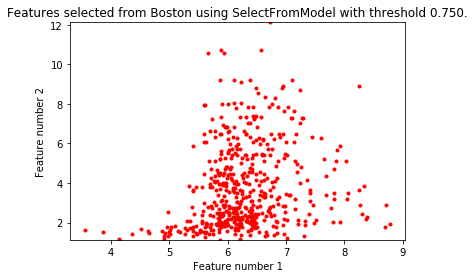

In [47]:
# Reset the threshold till the number of features equals two.
# Note that the attribute can be set directly instead of repeatedly
# fitting the metatransformer.
while n_features > 2:
    sfm.threshold += 0.1
    X_transform = sfm.transform(X)
    n_features = X_transform.shape[1]

# Plot the selected two features from X.
plt.title(
    "Features selected from Boston using SelectFromModel with "
    "threshold %0.3f." % sfm.threshold)
feature1 = X_transform[:, 0]
feature2 = X_transform[:, 1] 
plt.plot(feature1, feature2, 'r.')
plt.xlabel("Feature number 1")
plt.ylabel("Feature number 2")
plt.ylim([np.min(feature2), np.max(feature2)])
plt.show()

In [ ]:
基于树的特征选择Tree-based feature selection
基于树的评估器 (查看sklearn.tree 模块以及在sklearn.ensemble模块中的树的森林)
可以被用来计算特征的重要性，根据特征的重要性去掉无关紧要的特征
(当配合sklearn.feature_selection.SelectFromModel meta-transformer):

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectFromModel
iris = load_iris()
X, y = iris.data, iris.target
X.shape
＃(150, 4)
clf = ExtraTreesClassifier()
clf = clf.fit(X, y)
clf.feature_importances_  
# array([ 0.04...,  0.05...,  0.4...,  0.4...])
model = SelectFromModel(clf, prefit=True)
X_new = model.transform(X)
X_new.shape               
# ＃(150, 2)

# 2. Recursive Feature Elimination

不单独地检验某个特征的价值，而是检验特征集的价值。对于一个数量为n的特征集合，子集的个数为2的n次方减一。通过指定一个学习算法，通过算法计算所有子集的error，选择error最小的子集作为选取的特征
RFE

对初始特征集合中每个特征赋予一个初始权重。
训练，将权重最小的特征移除。
不断迭代，直到特征集合的数目达到预定值。 

In [32]:
# Feature Extraction with RFE
from pandas import read_csv
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [33]:
# load data
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = read_csv(url, names=names)

X = dataframe.iloc[:,0:8]
Y = dataframe.iloc[:,8]


In [39]:
# feature extraction
model = LogisticRegression()
rfe = RFE(model, 3)
fit = rfe.fit(X, Y)
fit.n_features_

3

In [40]:
fit.support_

array([ True, False, False, False, False,  True,  True, False])

In [41]:
fit.ranking_

array([1, 2, 3, 5, 6, 1, 1, 4])

# 3. Principal Component Analysis

In [ ]:
# Feature Extraction with PCA
import numpy
from pandas import read_csv
from sklearn.decomposition import PCA
# load data
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = read_csv(url, names=names)
array = dataframe.values
X = array[:,0:8]
Y = array[:,8]


In [ ]:
# feature extraction
pca = PCA(n_components=3)
fit = pca.fit(X)
# summarize components
print("Explained Variance: %s") % fit.explained_variance_ratio_
print(fit.components_)

# 4. Feature Importance

Bagged decision trees like Random Forest and Extra Trees can be used to estimate the importance of features.

In [42]:
# Feature Importance with Extra Trees Classifier
from pandas import read_csv
from sklearn.ensemble import ExtraTreesClassifier


In [ ]:
# load data
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = read_csv(url, names=names)
array = dataframe.values
X = array[:,0:8]
Y = array[:,8]


In [43]:
# feature extraction
model = ExtraTreesClassifier()
model.fit(X, Y)
print(model.feature_importances_)

[0.114 0.242 0.096 0.075 0.082 0.131 0.121 0.139]
